In [ ]:
# Задачи

#     Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
#     Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

#     Какой клиент совершил больше всего успешных операций? (success == True)

#     С какой платформы осуществляется наибольшее количество успешных операций?

#     Какую платформу предпочитают премиумные клиенты?

#     Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

#     Постройте график распределения числа успешных операций

#     Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, 
#     используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили 
#     наибольшее количество успешных действий?

In [ ]:
#     Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
#     Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
user_data = pd.read_csv('3_user_data.csv')
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [3]:
logs_data = pd.read_csv('3_logs.csv')
logs_data

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [4]:
user_data.shape

(2954, 3)

In [5]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [6]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [7]:
logs_data.shape

(4500, 4)

In [8]:
logs_data.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [9]:
logs_data.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [10]:
logs_data.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [ ]:
#     Какой клиент совершил больше всего успешных операций? (success == True)

In [11]:
logs_data \
    .query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values('success', ascending=False) \
    .query('success == 41') \
    .sort_values('client')

,client,success
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


In [ ]:
#     С какой платформы осуществляется наибольшее количество успешных операций?

In [12]:
logs_data \
    .query('success == True') \
    .groupby('platform', as_index=False) \
    .agg({'success': 'count'}) 

,platform,success
0,computer,1090
1,phone,2019
2,tablet,180


In [ ]:
#     Какую платформу предпочитают премиумные клиенты?

In [13]:
user_logs_data = user_data.merge(logs_data, on='client')
user_logs_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [14]:
user_logs_data \
    .query('premium == True') \
    .groupby('platform', as_index=False) \
    .agg({'success': 'count'})

,platform,success
0,computer,150
1,phone,246
2,tablet,24


In [ ]:
#     Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

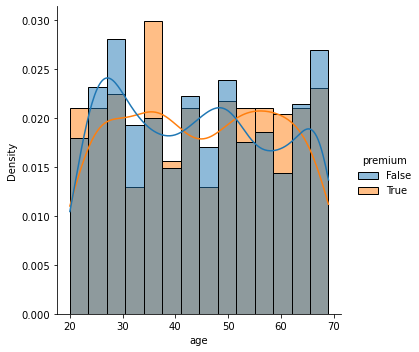

In [15]:
sns.displot(data = user_logs_data, x='age', hue='premium', kde=True, kind='hist', stat="density",
           common_norm=False, bins=14)

C:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

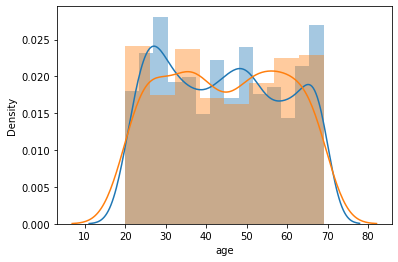

In [18]:
sns.distplot(user_logs_data.query('premium == False').age)
sns.distplot(user_logs_data.query('premium == True').age)

In [ ]:
#     Постройте график распределения числа успешных операций

In [16]:
success_df = user_logs_data.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'count'})
success_df

,client,success
0,40,1
1,75,1
2,81,1
3,132,1
4,164,1
...,...,...
2099,99908,1
2100,99926,1
2101,99927,1
2102,99931,1


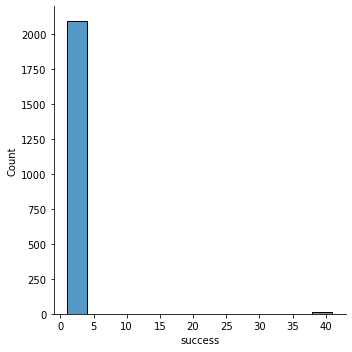

In [17]:
sns.displot(success_df.success)

In [ ]:
#     Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, 
#     используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили 
#     наибольшее количество успешных действий?

In [18]:
comp_df = user_logs_data.query("platform == 'computer'")
comp_df

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
23,74867,True,27,False,computer,1585452086
...,...,...,...,...,...,...
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079
3430,61851,False,31,True,computer,1585473042


<AxesSubplot:xlabel='age', ylabel='count'>

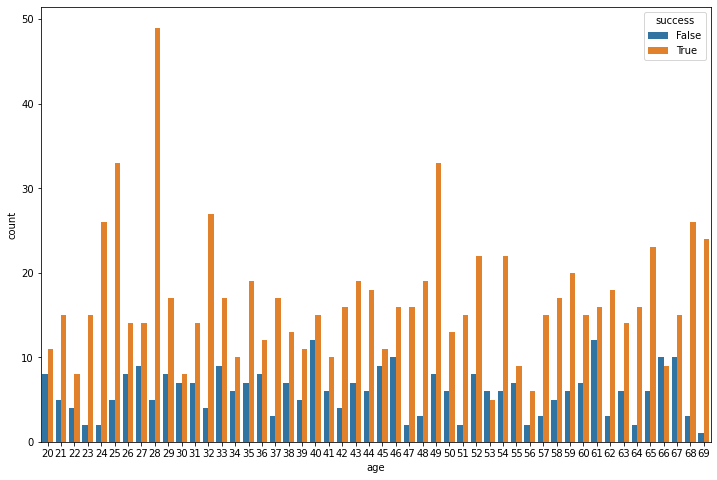

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age', hue='success', data=comp_df)